<a href="https://colab.research.google.com/github/kurtsenol/machine-learning/blob/master/TopicModeling/LDA_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import pickle

In [ ]:
# DATA_PATH = 'drive/My Drive/Topic_Modeling/Dataset/'

In [ ]:
# folder = os.listdir(DATA_PATH)

# df = pd.DataFrame()

# for file_name in folder:
#   df_temp= pd.read_excel(DATA_PATH + file_name)
#   df_temp = df_temp[['TI', 'SO', 'PY','AB']]
#   df= pd.concat([df, df_temp], ignore_index=True)

In [ ]:
# df

In [ ]:
# df.info()

In [ ]:
# df.columns = ['Title', 'Journal', 'Year', 'Abstract']

In [ ]:
# df['Abstract'].isnull().sum()

In [ ]:
# df[df['Abstract'].isnull()]

In [ ]:
# mis = df[df['Abstract'].isnull()]

In [ ]:
# mis.to_excel('drive/My Drive/Topic_Modeling/missing.xlsx')

In [ ]:
# mis = df[df['Year'].isnull()]

In [ ]:
# mis.to_excel('drive/My Drive/Topic_Modeling/missing_year.xlsx')

In [ ]:
# df.dropna(subset=['Abstract'], inplace=True)

In [ ]:
# df.reset_index(inplace=True, drop=True)

In [ ]:
# df.info()

In [ ]:
# df.to_pickle("drive/My Drive/Topic_Modeling/topic_df.pkl")

In [ ]:
df = pd.read_pickle("drive/My Drive/Topic_Modeling/topic_df.pkl")

In [ ]:
df

,Title,Journal,Year,Abstract
0,TWO-DIRECTIONAL CONVERGENCE OF PLATFORM AND PIPELINE BUSINESS MODELS,JOURNAL OF SERVICE MANAGEMENT,NaN,PURPOSE THIS ARTICLE EXAMINES THE NEW PHENOMENON OF THE CONVERGENCE OF PLATFORM AND PIPELINE BUSINESS MODELS. IT EXAMINES THE POTENTIAL SYNERGIES AND CHALLENGES FOR PLATFORMS TO ADD PIPELINE COMPO...
1,EMPLOYEE WELLNESS ON THE FRONTLINE: AN INTERACTIONAL PSYCHOLOGY PERSPECTIVE,JOURNAL OF SERVICE MANAGEMENT,NaN,"PURPOSE EMPLOYEE WELLNESS IS VITAL TO CREATING HIGH-QUALITY EMPLOYEE-CUSTOMER INTERACTIONS, YET FRONTLINE SERVICE WORKERS (FLSWS) DO NOT TYPICALLY ENGAGE IN, OR BENEFIT FROM, WELLNESS INITIATIVES...."
2,DEMOGRAPHIC AND ATTITUDINAL ANTECEDENTS OF CONSUMERS' USE AND SELF-INVESTMENT TRAJECTORIES OVER TIME IN AN ONLINE TV CONTENT PLATFORM,JOURNAL OF SERVICE MANAGEMENT,NaN,PURPOSE TO INVESTIGATE IF ONLINE TV CONTENT PLATFORMS CREATE VALUE FOR CONSUMERS (AND INCREASE USE) BY OFFERING ITS USERS THE POSSIBILITY TO SELF-INVEST IN THE SERVICE (BY GIVING PERSONAL CONTENT ...
3,MORE THAN A FEELING? TOWARD A THEORY OF CUSTOMER DELIGHT,JOURNAL OF SERVICE MANAGEMENT,NaN,"PURPOSE RESPONDING TO AN INCREASING CALL FOR A MORE COMPREHENSIVE CONCEPTUALIZATION OF CUSTOMER DELIGHT, THE PURPOSE OF THIS PAPER IS TO EXPAND THE THEORY OF CUSTOMER DELIGHT AND TO EXAMINE THE IM..."
4,ACCOUNTABLE ALGORITHMS? THE ETHICAL IMPLICATIONS OF DATA-DRIVEN BUSINESS MODELS,JOURNAL OF SERVICE MANAGEMENT,NaN,"PURPOSE THE PURPOSE OF THIS STUDY IS TO IDENTIFY, ANALYZE AND EXPLAIN THE ETHICAL IMPLICATIONS THAT CAN RESULT FROM THE DATAFICATION OF SERVICE. DESIGN/METHODOLOGY/APPROACH THIS STUDY USES A MIDRA..."
...,...,...,...,...
10869,A COMMENTARY ON THE CASE STUDY OF STATE-OWNED HOTELS IN CHINA,CORNELL HOSPITALITY QUARTERLY,2011.0,THE COMPARISON OF STEPHEN RUSHMORE'S SEVEN HOTEL VALUATION TECHNIQUES PROVIDES A STARTING POINT FOR APPROACHES TO VALUING GOVERNMENT-OWNED HOTELS IN THE PEOPLE'S REPUBLIC OF CHINA. ALTHOUGH THE AU...
10870,COMMENTARY ON A CASE STUDY OF STATE-OWNED HOTELS IN CHINA,CORNELL HOSPITALITY QUARTERLY,2011.0,"THE RECENT LIQUIDITY CRISIS IN THE GLOBAL HOTEL SECTOR MAKES VALUATION MORE CRITICAL THAN EVER, AS A TWO-YEAR SCARCITY IN TRANSACTIONS AND REDUCED PRICES HAVE CHALLENGED HOTEL VALUATION METHODOLOG..."
10871,A MULTIDIMENSIONAL SCALE OF SWITCHING BARRIERS IN THE FULL-SERVICE RESTAURANT INDUSTRY,CORNELL HOSPITALITY QUARTERLY,2011.0,THIS RESEARCH ATTEMPTED TO DEVELOP A MEASUREMENT SCALE OF SWITCHING BARRIERS IN FULL-SERVICE RESTAURANTS BY IDENTIFYING EXISTING COMPONENTS OF SWITCHING BARRIERS. A QUALITATIVE PROCEDURE IDENTIFIE...
10872,A COMPARISON OF COLD-WATER THAWING OPTIONS IN CHINESE RESTAURANTS,CORNELL HOSPITALITY QUARTERLY,2011.0,"CONSIDERING ALL TYPES OF RESTAURANTS IN HONG KONG, CHINESE RESTAURANTS HAVE THE GREATEST NUMERICAL COUNT, AND THEY REPRESENT A SIGNIFICANT PROPORTION OF LOCAL RESTAURANT RECEIPTS. CHINESE RESTAURA..."


In [ ]:
# df.groupby('Journal')['Abstract'].count()

In [ ]:
# order = df.Journal.value_counts(ascending=True).index

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.set()

In [ ]:
# plt.figure(figsize=(18,10))
# sns.countplot(y='Journal', data=df, orient='h', order=order);

In [ ]:
# plt.figure(figsize=(12,6))
# sns.countplot(x='Year', data=df, orient='v');

In [ ]:
# pd.crosstab(df.Journal, df.Year, dropna=False) 

In [ ]:
# sns.set(font_scale=1.5)

# sns.catplot(data=df, x='Year', col="Journal", col_wrap=3, sharex=False, height=10, kind='count')


In [ ]:
papers = list(df.Abstract.values)

In [ ]:
# papers1 = df.Abstract.values.tolist()

In [ ]:
# papers==papers1

In [ ]:
len(papers)

10874

In [ ]:
print(papers[0][:1000])

PURPOSE THIS ARTICLE EXAMINES THE NEW PHENOMENON OF THE CONVERGENCE OF PLATFORM AND PIPELINE BUSINESS MODELS. IT EXAMINES THE POTENTIAL SYNERGIES AND CHALLENGES FOR PLATFORMS TO ADD PIPELINE COMPONENTS AND VICE VERSA FOR PIPELINE BUSINESSES. DESIGN/METHODOLOGY/APPROACH THIS PAPER USES A CONCEPTUAL APPROACH THAT SYNTHESIZES AND INTEGRATES THE LITERATURE FROM SERVICE, HOSPITALITY, AND STRATEGY, AND SUPPLEMENTS THEM WITH TWO ILLUSTRATIVE MINI-CASE STUDIES. FINDINGS WHILE THE EXTANT LITERATURE TYPICALLY FOCUSES ON THE DICHOTOMY BETWEEN INCUMBENT PIPELINE BUSINESSES THAT CREATE VALUE BY CONTROLLING A LINEAR SERIES OF ACTIVITIES AND NETWORK EFFECTS-DRIVEN PLATFORMS, WE DIFFERENTIATE BETWEEN TWO TYPES OF PLATFORM BUSINESS MODELS (I.E. PLATFORMS WITH ASSET CONTROL AND PLATFORMS WITH PEER-PROVIDED ASSETS). FURTHER, WE IDENTIFY THREE COMMON PATHWAYS OF CONVERGENCE; THAT IS, PIPELINES MOVING TOWARDS (1) PLATFORMS WITH ASSET CONTROL AND (2) THOSE WITH PEER-PROVIDED ASSETS, AND (3) PLATFORMS WITH P

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# extension = ["model", "paper", "data", "approach", "research", "result","travel",
#              "tourism", "tourist", "hospitality", "result", "purpose",  "study",
#              "analysis", "problem", "use", "approach", "different",
#              "propose", "system", "industry", "role", "destination", "social"]

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')

In [ ]:
"hospitality" in stop_words

False

In [ ]:
!pip install pyLDAvis

In [ ]:
!python -m spacy download en_core_web_md

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt

### Tokenize Sentences and Clean

In [ ]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = papers
data_words = list(sent_to_words(data))
print(data_words[:1])

[['purpose', 'this', 'article', 'examines', 'the', 'new', 'phenomenon', 'of', 'the', 'convergence', 'of', 'platform', 'and', 'pipeline', 'business', 'models', 'it', 'examines', 'the', 'potential', 'synergies', 'and', 'challenges', 'for', 'platforms', 'to', 'add', 'pipeline', 'components', 'and', 'vice', 'versa', 'for', 'pipeline', 'businesses', 'design', 'methodology', 'approach', 'this', 'paper', 'uses', 'conceptual', 'approach', 'that', 'synthesizes', 'and', 'integrates', 'the', 'literature', 'from', 'service', 'hospitality', 'and', 'strategy', 'and', 'supplements', 'them', 'with', 'two', 'illustrative', 'mini', 'case', 'studies', 'findings', 'while', 'the', 'extant', 'literature', 'typically', 'focuses', 'on', 'the', 'dichotomy', 'between', 'incumbent', 'pipeline', 'businesses', 'that', 'create', 'value', 'by', 'controlling', 'linear', 'series', 'of', 'activities', 'and', 'network', 'effects', 'driven', 'platforms', 'we', 'differentiate', 'between', 'two', 'types', 'of', 'platform',

### Build the Bigram, Trigram Models and Lemmatize

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=20, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])
    
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags and len(token.text)>3])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
#stop_words = nltk.corpus.stopwords.words('english')

In [ ]:
data_ready = process_words(data_words)  # processed Text Data!

In [ ]:
data_ready[0]

['examine',
 'phenomenon',
 'convergence',
 'platform',
 'pipeline',
 'business',
 'model',
 'examine',
 'potential',
 'synergy',
 'challenge',
 'platform',
 'pipeline',
 'component',
 'pipeline',
 'business',
 'paper',
 'use',
 'conceptual',
 'approach',
 'synthesize',
 'literature',
 'service',
 'hospitality',
 'strategy',
 'supplement',
 'illustrative',
 'mini',
 'case',
 'study',
 'finding',
 'extant',
 'literature',
 'typically',
 'focus',
 'dichotomy',
 'incumbent',
 'pipeline',
 'business',
 'create',
 'value',
 'control',
 'linear',
 'series',
 'activity',
 'network',
 'effect',
 'drive',
 'platform',
 'differentiate',
 'type',
 'platform',
 'business',
 'model',
 'peer',
 'provide',
 'asset',
 'identify',
 'common',
 'pathway',
 'convergence',
 'pipeline',
 'move',
 'platform',
 'asset',
 'control',
 'peer',
 'provide',
 'asset',
 'platform',
 'peer',
 'provide',
 'asset',
 'adopt',
 'define',
 'business',
 'characteristic',
 'pipeline',
 'furthermore',
 'contrast',
 'characte

In [ ]:
df.Abstract[0]

'PURPOSE THIS ARTICLE EXAMINES THE NEW PHENOMENON OF THE CONVERGENCE OF PLATFORM AND PIPELINE BUSINESS MODELS. IT EXAMINES THE POTENTIAL SYNERGIES AND CHALLENGES FOR PLATFORMS TO ADD PIPELINE COMPONENTS AND VICE VERSA FOR PIPELINE BUSINESSES. DESIGN/METHODOLOGY/APPROACH THIS PAPER USES A CONCEPTUAL APPROACH THAT SYNTHESIZES AND INTEGRATES THE LITERATURE FROM SERVICE, HOSPITALITY, AND STRATEGY, AND SUPPLEMENTS THEM WITH TWO ILLUSTRATIVE MINI-CASE STUDIES. FINDINGS WHILE THE EXTANT LITERATURE TYPICALLY FOCUSES ON THE DICHOTOMY BETWEEN INCUMBENT PIPELINE BUSINESSES THAT CREATE VALUE BY CONTROLLING A LINEAR SERIES OF ACTIVITIES AND NETWORK EFFECTS-DRIVEN PLATFORMS, WE DIFFERENTIATE BETWEEN TWO TYPES OF PLATFORM BUSINESS MODELS (I.E. PLATFORMS WITH ASSET CONTROL AND PLATFORMS WITH PEER-PROVIDED ASSETS). FURTHER, WE IDENTIFY THREE COMMON PATHWAYS OF CONVERGENCE; THAT IS, PIPELINES MOVING TOWARDS (1) PLATFORMS WITH ASSET CONTROL AND (2) THOSE WITH PEER-PROVIDED ASSETS, AND (3) PLATFORMS WITH 

### Create the Dictionary and Corpus needed for Topic Modeling

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

print('Sample word to number mappings:', list(id2word.items())[:15])
print('Total Vocabulary Size:', len(id2word))

Sample word to number mappings: [(0, 'activity'), (1, 'adopt'), (2, 'also'), (3, 'approach'), (4, 'article'), (5, 'asset'), (6, 'business'), (7, 'case'), (8, 'challenge'), (9, 'characteristic'), (10, 'common'), (11, 'component'), (12, 'conceptual'), (13, 'conceptualize'), (14, 'consideration')]
Total Vocabulary Size: 14262


In [ ]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [ ]:
corpus[0][:15]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 2),
 (5, 9),
 (6, 12),
 (7, 1),
 (8, 8),
 (9, 2),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1)]

In [ ]:
# viewing actual terms and their counts
print([(id2word[idx] , freq) for idx, freq in corpus[0][:15]])

[('activity', 1), ('adopt', 1), ('also', 1), ('approach', 1), ('article', 2), ('asset', 9), ('business', 12), ('case', 1), ('challenge', 8), ('characteristic', 2), ('common', 1), ('component', 1), ('conceptual', 1), ('conceptualize', 1), ('consideration', 1)]


In [ ]:
dict_corpus = {}

for i in range(len(corpus)):
  for idx, freq in corpus[i]:
    if id2word[idx] in dict_corpus:
      dict_corpus[id2word[idx]] += freq
    else:
       dict_corpus[id2word[idx]] = freq


In [ ]:
dict_corpus

{'activity': 1658,
 'adopt': 853,
 'also': 3645,
 'approach': 2411,
 'article': 1312,
 'asset': 209,
 'business': 1844,
 'case': 1230,
 'challenge': 905,
 'characteristic': 1110,
 'common': 345,
 'component': 467,
 'conceptual': 707,
 'conceptualize': 159,
 'consideration': 279,
 'contrast': 276,
 'control': 592,
 'convergence': 69,
 'create': 965,
 'define': 360,
 'develop': 2738,
 'dichotomy': 25,
 'different': 2648,
 'differentiate': 145,
 'drive': 523,
 'effect': 5104,
 'embark': 11,
 'encounter': 404,
 'entail': 46,
 'examine': 4354,
 'extant': 164,
 'extension': 63,
 'finally': 441,
 'finding': 5541,
 'first': 1452,
 'focus': 1917,
 'furthermore': 532,
 'help': 900,
 'hospitality': 2573,
 'identify': 2870,
 'illustrative': 21,
 'implication': 4121,
 'incumbent': 20,
 'likely': 512,
 'linear': 90,
 'literature': 2240,
 'manager': 2097,
 'many': 856,
 'mini': 7,
 'minor': 18,
 'mitigate': 164,
 'model': 5060,
 'move': 139,
 'natural': 483,
 'network': 931,
 'offer': 1323,
 'paper':

In [ ]:
dict_df = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['freq'])

In [ ]:
dict_df

,freq
activity,1658
adopt,853
also,3645
approach,2411
article,1312
...,...
spider,1
tenability,1
pit,1
thawing,6


In [ ]:
extension = dict_df[dict_df.freq>2000].index.tolist()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


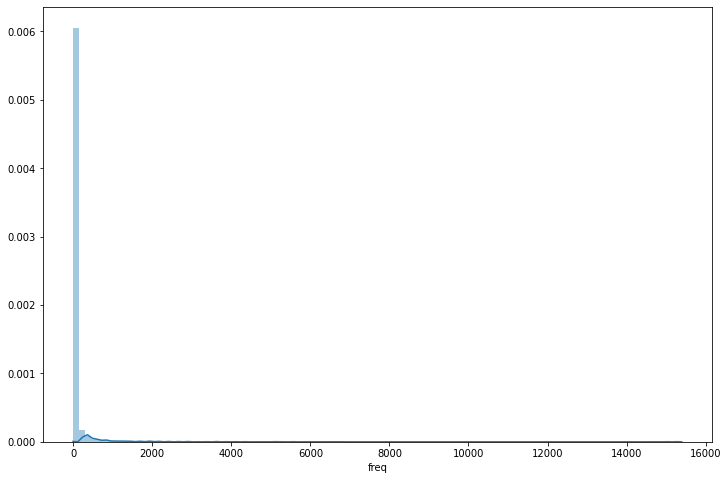

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.distplot(dict_df['freq'], bins=100);

In [ ]:
dict_df.loc['context']

freq    1985
Name: context, dtype: int64

In [ ]:
extension

['also',
 'approach',
 'develop',
 'different',
 'effect',
 'examine',
 'finding',
 'hospitality',
 'identify',
 'implication',
 'literature',
 'manager',
 'model',
 'paper',
 'provide',
 'service',
 'strategy',
 'study',
 'suggest',
 'use',
 'value',
 'behavior',
 'customer',
 'employee',
 'factor',
 'high',
 'important',
 'influence',
 'management',
 'quality',
 'theory',
 'consumer',
 'datum',
 'find',
 'increase',
 'investigate',
 'purpose',
 'research',
 'test',
 'base',
 'experience',
 'explore',
 'industry',
 'positive',
 'result',
 'satisfaction',
 'analysis',
 'development',
 'role',
 'work',
 'hotel',
 'impact',
 'performance',
 'process',
 'show',
 'significant',
 'social',
 'well',
 'perceive',
 'relationship',
 'understand',
 'intention',
 'market',
 'perception',
 'brand',
 'level',
 'tourism',
 'destination',
 'travel',
 'restaurant',
 'tourist',
 'visitor']

In [ ]:
stop_words.extend(extension)

In [ ]:
data_ready = process_words(data_words)

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

print('Sample word to number mappings:', list(id2word.items())[:15])
print('Total Vocabulary Size:', len(id2word))

Sample word to number mappings: [(0, 'activity'), (1, 'adopt'), (2, 'article'), (3, 'asset'), (4, 'business'), (5, 'case'), (6, 'challenge'), (7, 'characteristic'), (8, 'common'), (9, 'component'), (10, 'conceptual'), (11, 'conceptualize'), (12, 'consideration'), (13, 'contrast'), (14, 'control')]
Total Vocabulary Size: 14352


In [ ]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [ ]:
dict_corpus_1 = {}

for i in range(10874):
  for idx, freq in corpus[i]:
    if id2word[idx] in dict_corpus_1:
      dict_corpus_1[id2word[idx]] += freq
    else:
       dict_corpus_1[id2word[idx]] = freq

In [ ]:
dict_df_1 = pd.DataFrame.from_dict(dict_corpus_1, orient='index', columns=['freq'])

In [ ]:
extension_1 = dict_df_1[dict_df_1.freq>2000].index.tolist()

In [ ]:
extension_1

['context']

In [ ]:
dict_df_1.loc['context']

freq    2009
Name: context, dtype: int64

In [ ]:
print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 14352


We removed all terms that occur fewer than 20 times across all documents and all
terms that occur in more than 60% of all the documents. We are interested in finding different themes and topics and not recurring themes. Hence, this suits our scenario perfectly. We can now perform feature engineering by leveraging a simple Bag of Words model.

In [ ]:
# Filter out words that occur less than 20 documents, or more than 50% of the documents.

id2word.filter_extremes(no_below=20, no_above=0.5)

print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 2793


In [ ]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [ ]:
len(corpus)

10874

### Build the Topic Model

In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

--2020-06-08 07:35:54--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip.2’

mallet-2.0.8.zip.2  100%[===================>]  15.43M  20.2MB/s    in 0.8s    

2020-06-08 07:35:55 (20.2 MB/s) - ‘mallet-2.0.8.zip.2’ saved [16184794/16184794]



In [ ]:
!unzip mallet-2.0.8.zip

Archive:  mallet-2.0.8.zip
replace mallet-2.0.8/bin/classifier2info? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace mallet-2.0.8/bin/csv2classify? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [ ]:
ldamallet = gensim.models.wrappers.LdaMallet( mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
# gensimmodelMallet = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

In [ ]:
# coherencemodel = CoherenceModel(gensimmodelMallet, texts=data_ready, dictionary=id2word)
# # print(coherencemodel.get_coherence())

In [ ]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_ready, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('firm', 0.03465052365743148),
   ('business', 0.03400059422119884),
   ('environmental', 0.02681423159771225),
   ('risk', 0.02566292802495729),
   ('innovation', 0.022394711431330313),
   ('company', 0.01791948302755701),
   ('resource', 0.016025402956250465),
   ('financial', 0.013982767585233603),
   ('technology', 0.013351407561464756),
   ('cost', 0.012812894600014856)]),
 (1,
  [('online', 0.0314639530098395),
   ('attribute', 0.026282315088480675),
   ('price', 0.022784241834711363),
   ('product', 0.022503647723446443),
   ('guest', 0.021530921471061393),
   ('review', 0.020651726589097984),
   ('traveler', 0.017378128624340603),
   ('segment', 0.016760821579557782),
   ('green', 0.016255752179280932),
   ('characteristic', 0.01616222080885929)]),
 (2,
  [('practice', 0.03325403211699262),
   ('framework', 0.028513452051918974),
   ('knowledge', 0.027428891299023896),
   ('future', 0.02702655424553056),
   ('perspective', 0.023510478256306196),
   ('article', 0.0207465

In [ ]:
pickle.dump(ldamallet, open("drive/My Drive/Topic_Modeling/lda_mallet_10.pkl", "wb"))

In [ ]:
ldamallet = pickle.load(open("drive/My Drive/Topic_Modeling/lda_mallet_10.pkl", "rb"))

In [ ]:
tm_results = ldamallet[corpus]

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


We can now get the most dominant topic per research paper with some intelligent sorting and indexing using the following code.

In [ ]:
tm_results

[[(0, 0.2556894243641232),
  (1, 0.17603748326639893),
  (2, 0.08768406961178045),
  (3, 0.20615796519410978),
  (4, 0.040829986613119144),
  (5, 0.03815261044176707),
  (6, 0.0428380187416332),
  (7, 0.048862115127175365),
  (8, 0.0535475234270415),
  (9, 0.050200803212851405)],
 [(0, 0.10215053763440861),
  (1, 0.047491039426523295),
  (2, 0.11559139784946236),
  (3, 0.07078853046594982),
  (4, 0.18906810035842295),
  (5, 0.08243727598566308),
  (6, 0.04838709677419355),
  (7, 0.13261648745519714),
  (8, 0.05555555555555555),
  (9, 0.15591397849462366)],
 [(0, 0.1070559610705596),
  (1, 0.16626115166261152),
  (2, 0.06082725060827251),
  (3, 0.08840227088402271),
  (4, 0.18653690186536903),
  (5, 0.0827250608272506),
  (6, 0.08029197080291971),
  (7, 0.11597729115977291),
  (8, 0.04866180048661801),
  (9, 0.06326034063260341)],
 [(0, 0.11692506459948322),
  (1, 0.062015503875969),
  (2, 0.21770025839793283),
  (3, 0.05878552971576228),
  (4, 0.19250645994832044),
  (5, 0.074935400516

In [ ]:
len(tm_results)

10874

In [ ]:
ldamallet[corpus[0]]

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
a = [w for a, w in ldamallet[corpus[0]]]

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
sum(a)

1.0000000000000002

In [ ]:
q = ldamallet[corpus[0]]

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
# create DataFrame using data 
df_y = pd.DataFrame(q, columns =['Topic', 'Weight']) 
  
print(df_y) 

   Topic    Weight
0      0  0.042838
1      1  0.100402
2      2  0.205489
3      3  0.123829
4      4  0.047523
5      5  0.050870
6      6  0.036814
7      7  0.084337
8      8  0.265730
9      9  0.042169


In [ ]:
df_e = pd.DataFrame.from_records([{v: k for v, k in row} for row in tm_results])
df_e.columns = ['Topic ' + str(i) for i in range(1,11)]
df_e

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
0,0.255689,0.176037,0.087684,0.206158,0.040830,0.038153,0.042838,0.048862,0.053548,0.050201
1,0.102151,0.047491,0.115591,0.070789,0.189068,0.082437,0.048387,0.132616,0.055556,0.155914
2,0.107056,0.166261,0.060827,0.088402,0.186537,0.082725,0.080292,0.115977,0.048662,0.063260
3,0.116925,0.062016,0.217700,0.058786,0.192506,0.074935,0.056848,0.079457,0.062661,0.078165
4,0.197429,0.043159,0.283747,0.102847,0.049587,0.102847,0.060606,0.056933,0.049587,0.053260
...,...,...,...,...,...,...,...,...,...,...
10869,0.080169,0.165963,0.116737,0.118143,0.095640,0.118143,0.071730,0.081575,0.074543,0.077356
10870,0.134710,0.222222,0.064897,0.137660,0.054081,0.086529,0.070796,0.106195,0.057030,0.065880
10871,0.098627,0.089888,0.074906,0.109863,0.124844,0.217228,0.062422,0.061174,0.061174,0.099875
10872,0.083333,0.103175,0.060516,0.059524,0.046627,0.057540,0.204365,0.163690,0.054563,0.166667


In [ ]:
df.loc[df.Year.isnull(), ['Year']] = 2020

In [ ]:
df_e['Year'] = df.Year

In [ ]:
df_e

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Year
0,0.255689,0.176037,0.087684,0.206158,0.040830,0.038153,0.042838,0.048862,0.053548,0.050201,2020.0
1,0.102151,0.047491,0.115591,0.070789,0.189068,0.082437,0.048387,0.132616,0.055556,0.155914,2020.0
2,0.107056,0.166261,0.060827,0.088402,0.186537,0.082725,0.080292,0.115977,0.048662,0.063260,2020.0
3,0.116925,0.062016,0.217700,0.058786,0.192506,0.074935,0.056848,0.079457,0.062661,0.078165,2020.0
4,0.197429,0.043159,0.283747,0.102847,0.049587,0.102847,0.060606,0.056933,0.049587,0.053260,2020.0
...,...,...,...,...,...,...,...,...,...,...,...
10869,0.080169,0.165963,0.116737,0.118143,0.095640,0.118143,0.071730,0.081575,0.074543,0.077356,2011.0
10870,0.134710,0.222222,0.064897,0.137660,0.054081,0.086529,0.070796,0.106195,0.057030,0.065880,2011.0
10871,0.098627,0.089888,0.074906,0.109863,0.124844,0.217228,0.062422,0.061174,0.061174,0.099875,2011.0
10872,0.083333,0.103175,0.060516,0.059524,0.046627,0.057540,0.204365,0.163690,0.054563,0.166667,2011.0


In [ ]:
df_e.groupby('Year').describe()

Topic 1                      ...  Topic 10                    
         count      mean       std  ...       50%       75%       max
Year                                ...                              
2011.0   714.0  0.099668  0.049882  ...  0.087871  0.115929  0.288440
2012.0   788.0  0.103904  0.055275  ...  0.084435  0.109841  0.342105
2013.0   792.0  0.098997  0.048080  ...  0.088889  0.118886  0.335004
2014.0   830.0  0.100018  0.049232  ...  0.083645  0.108449  0.408821
2015.0   993.0  0.104375  0.055392  ...  0.084011  0.109127  0.285024
2016.0  1189.0  0.097399  0.046429  ...  0.084746  0.112518  0.351111
2017.0  1324.0  0.096753  0.048548  ...  0.085217  0.113788  0.328141
2018.0  1400.0  0.098144  0.050441  ...  0.083213  0.108759  0.403238
2019.0  1638.0  0.096387  0.046811  ...  0.085293  0.112326  0.372168
2020.0  1206.0  0.094713  0.045474  ...  0.085277  0.113601  0.312281

[10 rows x 80 columns]

In [ ]:
df_e['Journal'] = df.Journal

In [ ]:
df_e.groupby(['Journal', 'Year']).describe()

Topic 1            ...  Topic 10          
                                     count      mean  ...       75%       max
Journal                     Year                      ...                    
ANNALS OF TOURISM RESEARCH  2011.0    66.0  0.081098  ...  0.103546  0.201235
                            2012.0    87.0  0.083632  ...  0.107263  0.217284
                            2013.0    74.0  0.081400  ...  0.110526  0.230769
                            2014.0    73.0  0.086374  ...  0.105137  0.189922
                            2015.0    54.0  0.086627  ...  0.104736  0.209877
...                                    ...       ...  ...       ...       ...
TOURISM RECREATION RESEARCH 2016.0    29.0  0.090610  ...  0.131410  0.211203
                            2017.0    43.0  0.082370  ...  0.114186  0.240000
                            2018.0    42.0  0.089154  ...  0.099125  0.203496
                            2019.0    42.0  0.081537  ...  0.141238  0.264264
                            2020.0    38.0  0.084252  ...  0.142210  0.291291

[155 rows x 80 columns]

In [ ]:
df_e.groupby('Year').mean()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
Year,,,,,,,,,,
2011.0,0.099668,0.099235,0.101022,0.103836,0.096565,0.101244,0.103193,0.097739,0.099577,0.097920
2012.0,0.103904,0.097615,0.097500,0.104813,0.096606,0.103121,0.101389,0.097460,0.100110,0.097481
2013.0,0.098997,0.097654,0.100287,0.100402,0.102271,0.096313,0.100841,0.098281,0.102473,0.102481
2014.0,0.100018,0.097458,0.102981,0.102332,0.102629,0.099491,0.102231,0.097953,0.100221,0.094686
2015.0,0.104375,0.101470,0.102565,0.096738,0.099309,0.101869,0.104910,0.098697,0.094570,0.095497
2016.0,0.097399,0.099296,0.102231,0.102834,0.102835,0.097933,0.098796,0.100247,0.100965,0.097464
2017.0,0.096753,0.099091,0.102294,0.103551,0.101413,0.099606,0.102252,0.096666,0.100889,0.097485
2018.0,0.098144,0.097709,0.104504,0.102583,0.105078,0.099200,0.098785,0.097691,0.100173,0.096132
2019.0,0.096387,0.101271,0.102357,0.100104,0.110984,0.097991,0.100905,0.096757,0.095460,0.097783


In [ ]:
df_jy = df_e.groupby(['Journal', 'Year']).mean()

In [ ]:
df_jy

Topic 1   Topic 2  ...   Topic 9  Topic 10
Journal                     Year                        ...                    
ANNALS OF TOURISM RESEARCH  2011.0  0.081098  0.077741  ...  0.126672  0.093358
                            2012.0  0.083632  0.078750  ...  0.118530  0.096704
                            2013.0  0.081400  0.080670  ...  0.122911  0.097025
                            2014.0  0.086374  0.081096  ...  0.117654  0.092578
                            2015.0  0.086627  0.089121  ...  0.128423  0.091059
...                                      ...       ...  ...       ...       ...
TOURISM RECREATION RESEARCH 2016.0  0.090610  0.086565  ...  0.139307  0.109873
                            2017.0  0.082370  0.077651  ...  0.116540  0.101896
                            2018.0  0.089154  0.087017  ...  0.145410  0.095119
                            2019.0  0.081537  0.087974  ...  0.110746  0.110004
                            2020.0  0.084252  0.084211  ...  0.144282  0.113277

[155 rows x 10 columns]

In [ ]:
df_melted = df_e.melt(id_vars=['Journal', 'Year'], value_vars=['Topic ' + str(i) for i in range(1,11)], var_name='Topic', value_name='Weight')
df_melted

,Journal,Year,Topic,Weight
0,JOURNAL OF SERVICE MANAGEMENT,2020.0,Topic 1,0.255689
1,JOURNAL OF SERVICE MANAGEMENT,2020.0,Topic 1,0.102151
2,JOURNAL OF SERVICE MANAGEMENT,2020.0,Topic 1,0.107056
3,JOURNAL OF SERVICE MANAGEMENT,2020.0,Topic 1,0.116925
4,JOURNAL OF SERVICE MANAGEMENT,2020.0,Topic 1,0.197429
...,...,...,...,...
108735,CORNELL HOSPITALITY QUARTERLY,2011.0,Topic 10,0.077356
108736,CORNELL HOSPITALITY QUARTERLY,2011.0,Topic 10,0.065880
108737,CORNELL HOSPITALITY QUARTERLY,2011.0,Topic 10,0.099875
108738,CORNELL HOSPITALITY QUARTERLY,2011.0,Topic 10,0.166667


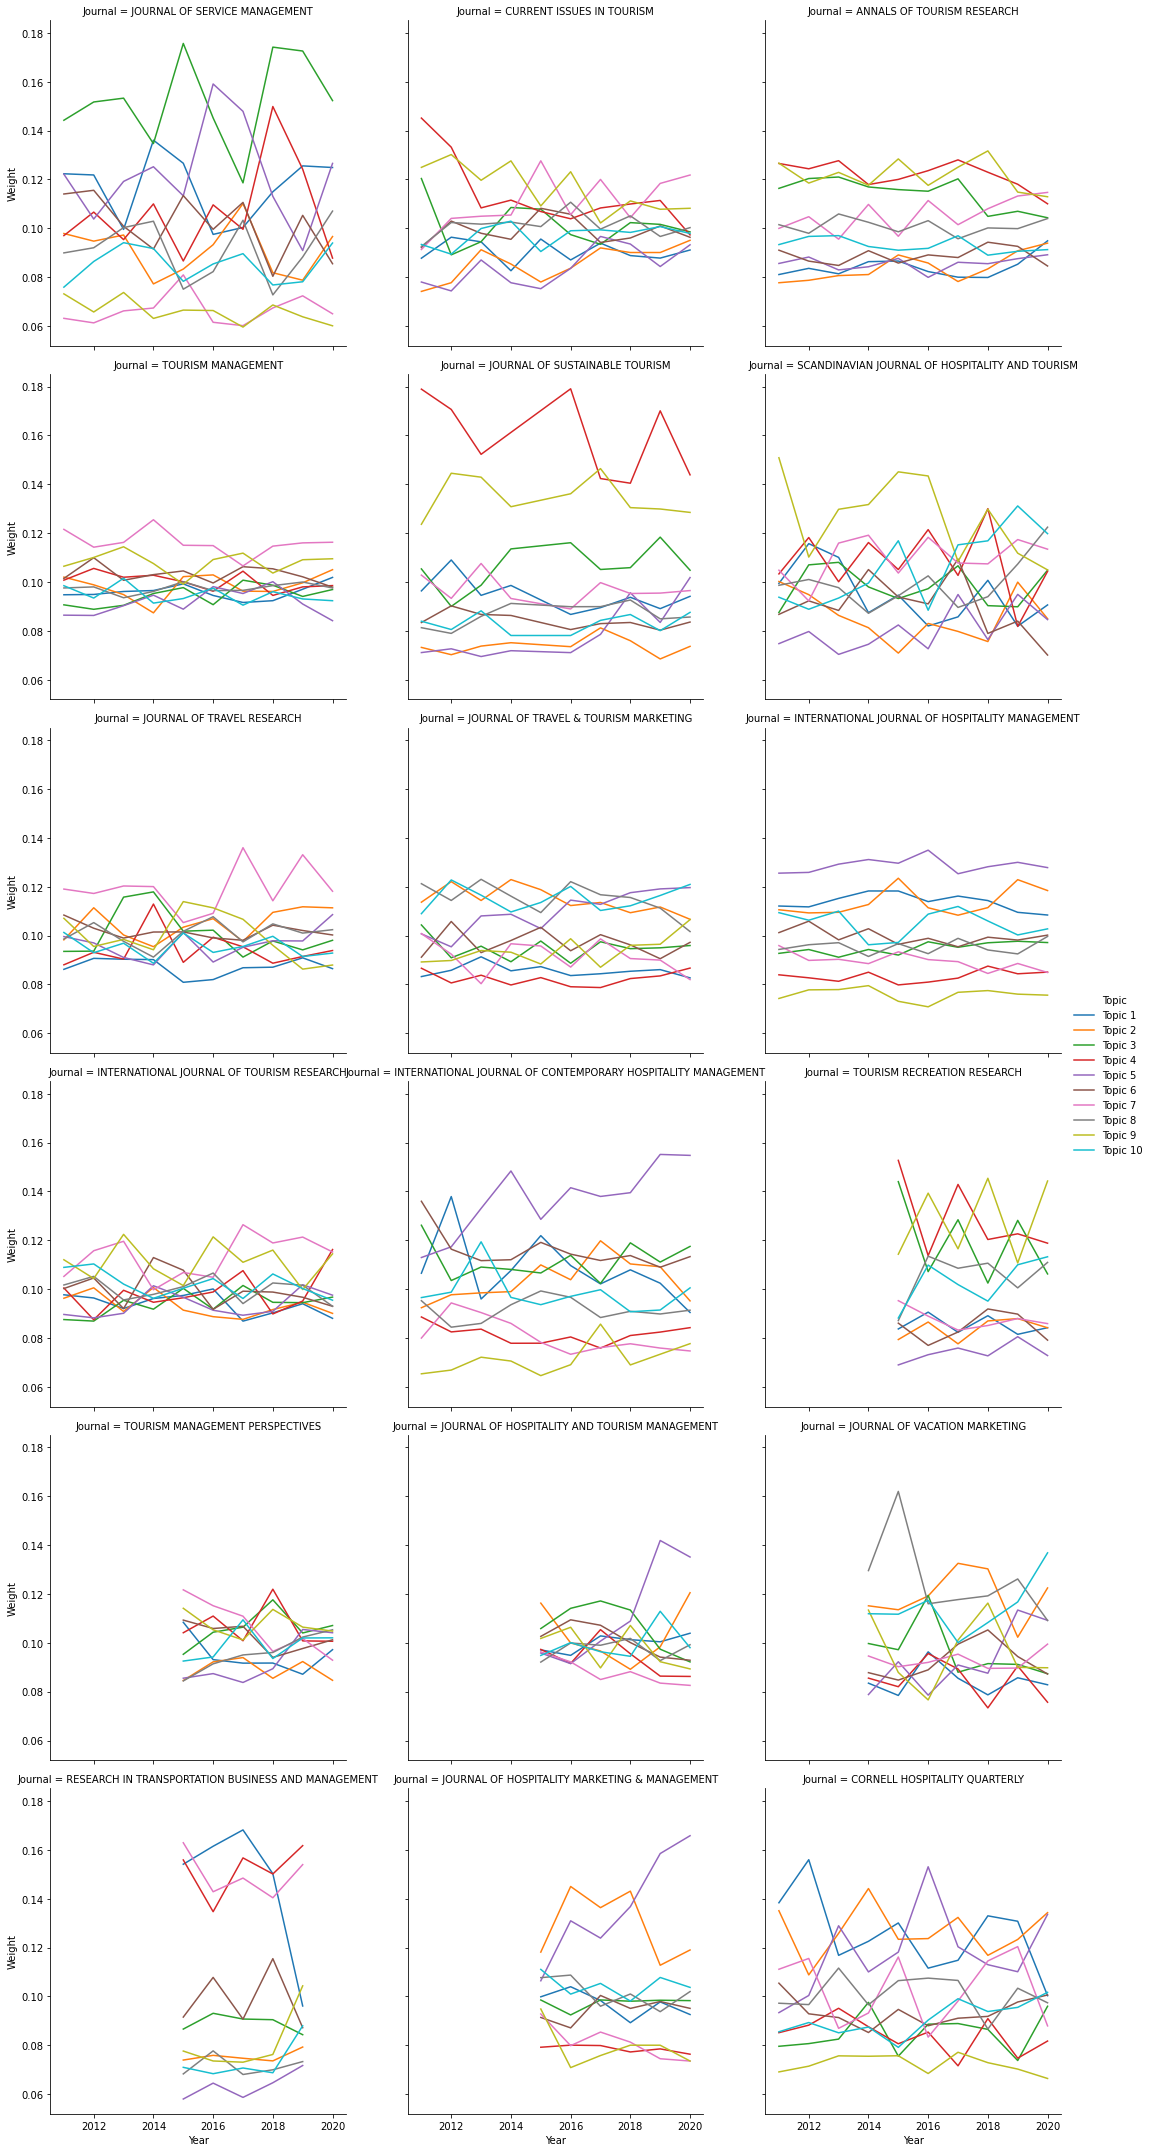

In [ ]:
# dash_styles = ["",
#                (4, 1.5), (2, 2), (3, 3), 
#                (1, 1),
#                (3, 1, 1.5, 1),
#                (5, 1, 1, 1),
#                (5, 1, 2, 1, 2, 1),
#                (2, 2, 3, 1.5),
#                (1, 2.5, 3, 1.2)]

sns.relplot(x='Year', y="Weight", col="Journal", col_wrap=3, hue='Topic',
data=df_melted,
kind="line",
style="Topic",
# markers=True)
dashes=False,
ci=None)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


<Figure size 432x288 with 0 Axes>

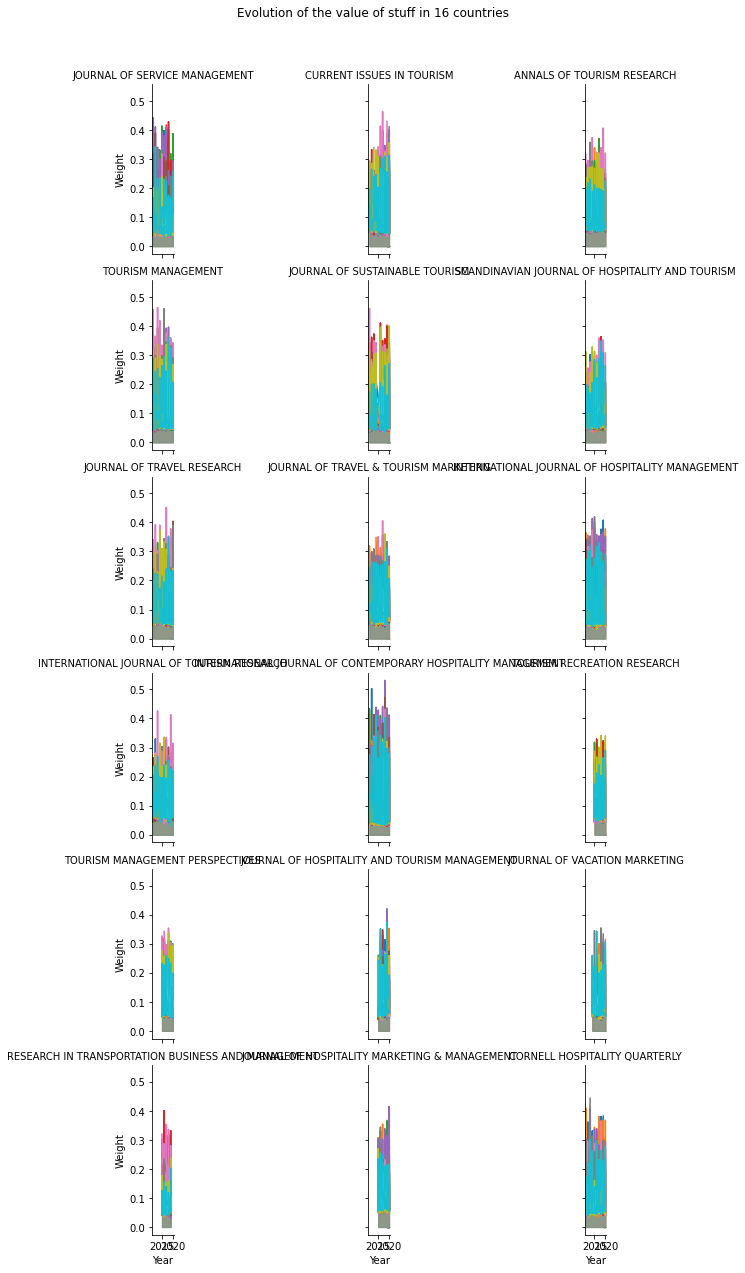

In [ ]:
# sns.relplot(x='Year', y="Weight", col="Journal", col_wrap=3, hue='Topic',
# data=df_melted,
plt.tight_layout()
# Create a grid : initialize it
g = sns.FacetGrid(df_melted, col='Journal', hue='Topic', col_wrap=3, )



# Add the line over the area with the plot function
g = g.map(plt.plot, 'Year', 'Weight')
 
# Fill the area with fill_between
g = g.map(plt.fill_between, 'Year', 'Weight', alpha=0.2).set_titles("{col_name} Journal")
 
# Control the title of each facet
g = g.set_titles("{col_name}")
 
# Add a title for the whole plo
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Evolution of the value of stuff in 16 countries')


plt.show()

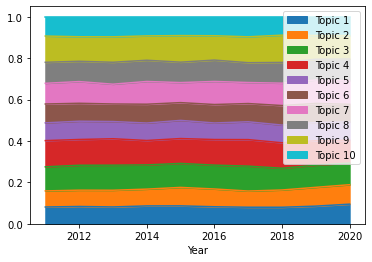

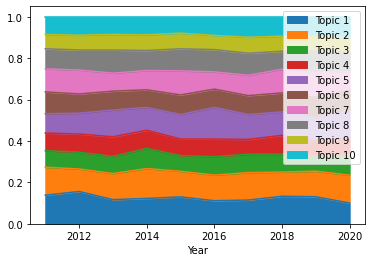

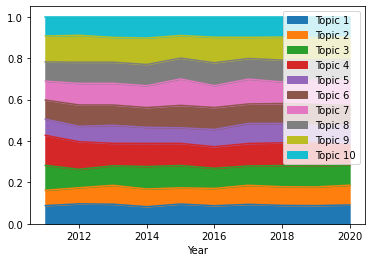

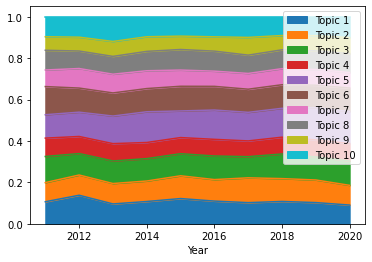

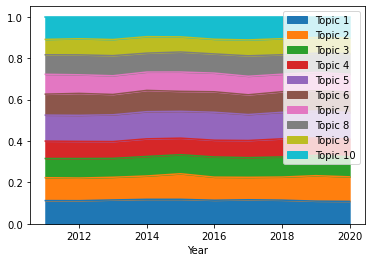

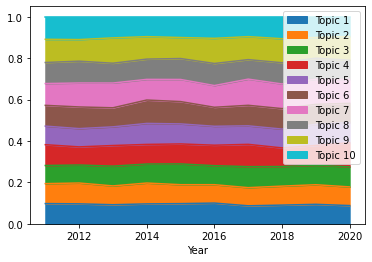

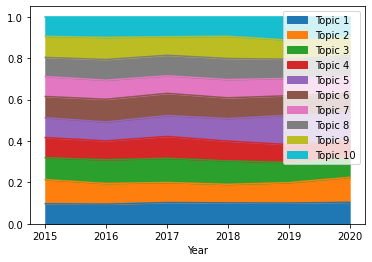

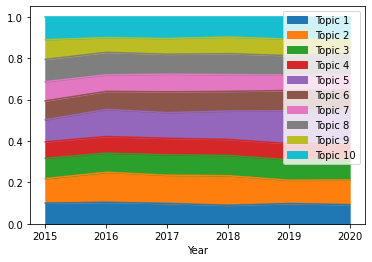

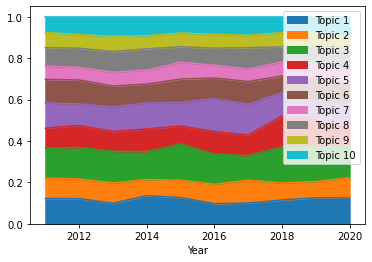

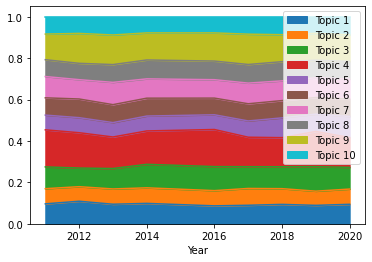

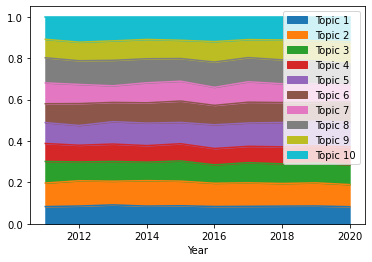

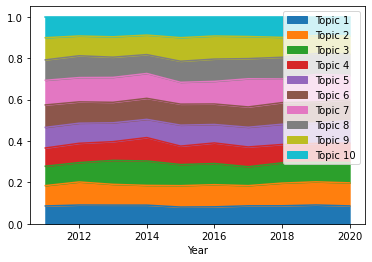

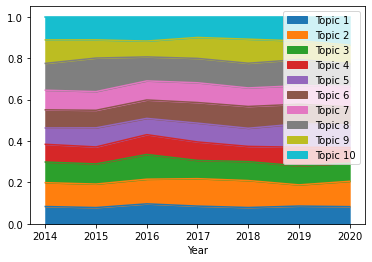

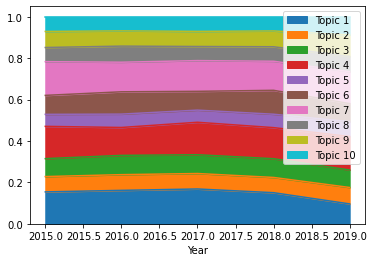

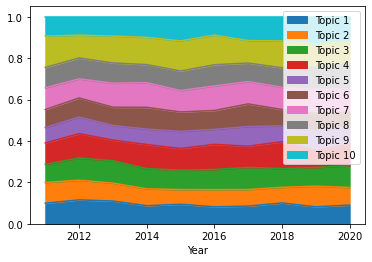

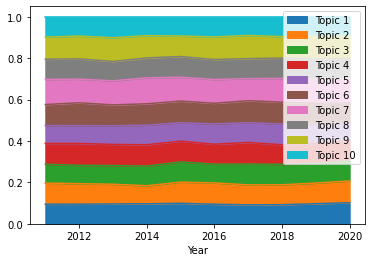

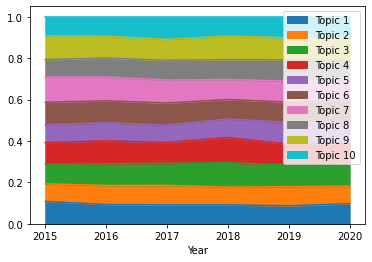

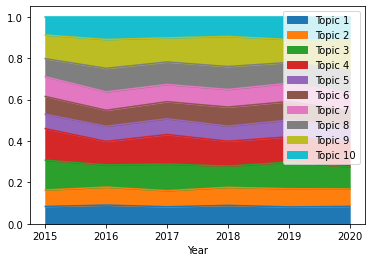

In [ ]:
for j in df_jy.index.levels[0]:
  df_jy.xs(j, level=0).plot.area()
  plt.legend(loc='upper right')
  plt.show()


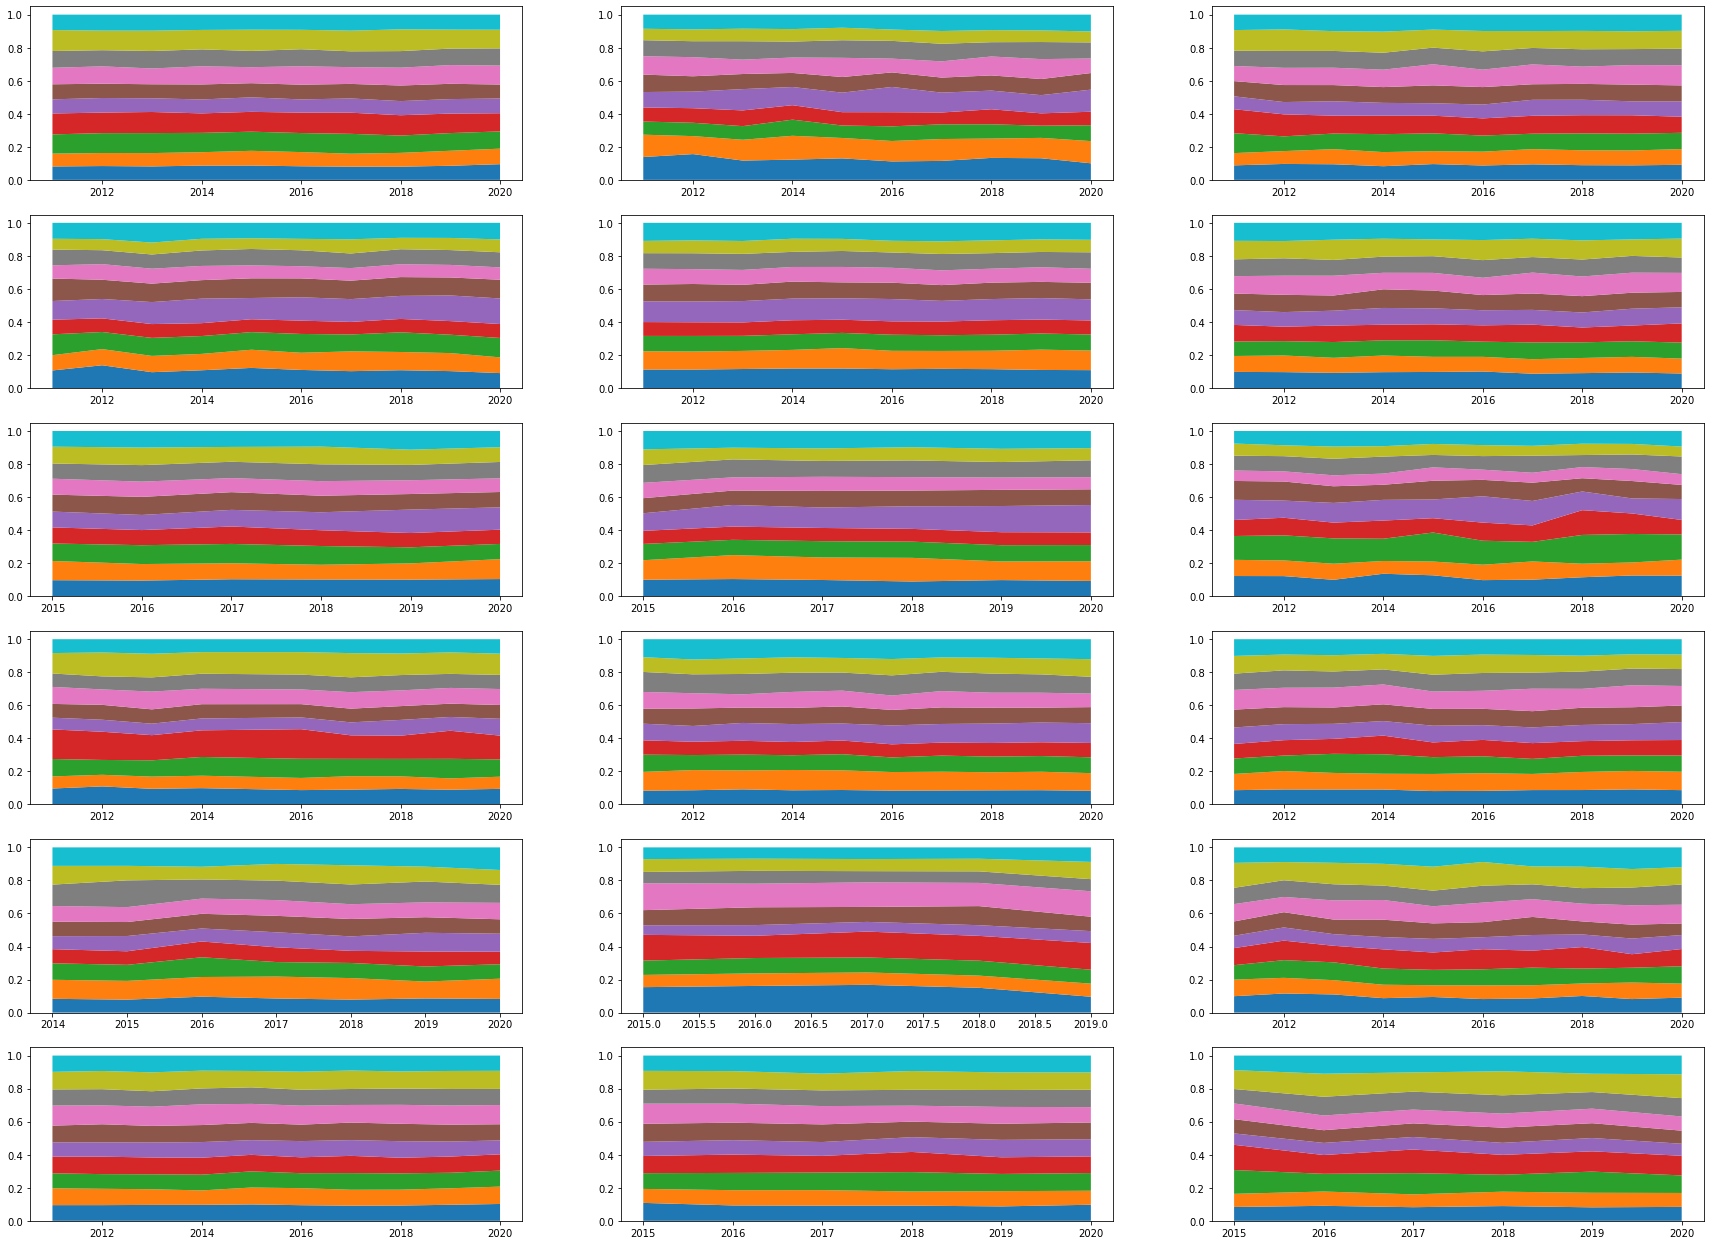

In [ ]:
plt.figure(figsize=(30,30))
for i, j in enumerate(df_jy.index.levels[0]):
  
  df_temp = df_jy.xs(j, level=0)
  plt.subplot(8, 3, i + 1)
  plt.stackplot(df_temp.index, df_temp['Topic 1'], df_temp['Topic 2'], df_temp['Topic 3'], df_temp['Topic 4'], df_temp['Topic 5'],
                                df_temp['Topic 6'], df_temp['Topic 7'], df_temp['Topic 8'], df_temp['Topic 9'], df_temp['Topic 10'])

plt.show()


In [ ]:
df_jy.xs(j, level=0)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
Year,,,,,,,,,,
2015.0,0.083731,0.079398,0.144020,0.152733,0.069012,0.086110,0.095304,0.087156,0.114321,0.088215
2016.0,0.090610,0.086565,0.107197,0.113769,0.073190,0.076995,0.088977,0.113518,0.139307,0.109873
2017.0,0.082370,0.077651,0.128424,0.142877,0.075916,0.082477,0.083268,0.108581,0.116540,0.101896
2018.0,0.089154,0.087017,0.102520,0.120345,0.072726,0.091916,0.085140,0.110653,0.145410,0.095119
2019.0,0.081537,0.087974,0.128170,0.122673,0.080560,0.089799,0.087988,0.100549,0.110746,0.110004
2020.0,0.084252,0.084211,0.106255,0.118837,0.072847,0.079151,0.085921,0.110967,0.144282,0.113277


In [ ]:
df_jy.index.levels

FrozenList([['ANNALS OF TOURISM RESEARCH', 'CORNELL HOSPITALITY QUARTERLY', 'CURRENT ISSUES IN TOURISM', 'INTERNATIONAL JOURNAL OF CONTEMPORARY HOSPITALITY MANAGEMENT', 'INTERNATIONAL JOURNAL OF HOSPITALITY MANAGEMENT', 'INTERNATIONAL JOURNAL OF TOURISM RESEARCH', 'JOURNAL OF HOSPITALITY AND TOURISM MANAGEMENT', 'JOURNAL OF HOSPITALITY MARKETING & MANAGEMENT', 'JOURNAL OF SERVICE MANAGEMENT', 'JOURNAL OF SUSTAINABLE TOURISM', 'JOURNAL OF TRAVEL & TOURISM MARKETING', 'JOURNAL OF TRAVEL RESEARCH', 'JOURNAL OF VACATION MARKETING', 'RESEARCH IN TRANSPORTATION BUSINESS AND MANAGEMENT', 'SCANDINAVIAN JOURNAL OF HOSPITALITY AND TOURISM', 'TOURISM MANAGEMENT', 'TOURISM MANAGEMENT PERSPECTIVES', 'TOURISM RECREATION RESEARCH'], [2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0]])

In [ ]:
[j for j in df_jy.index.levels[0]]

['ANNALS OF TOURISM RESEARCH',
 'CORNELL HOSPITALITY QUARTERLY',
 'CURRENT ISSUES IN TOURISM',
 'INTERNATIONAL JOURNAL OF CONTEMPORARY HOSPITALITY MANAGEMENT',
 'INTERNATIONAL JOURNAL OF HOSPITALITY MANAGEMENT',
 'INTERNATIONAL JOURNAL OF TOURISM RESEARCH',
 'JOURNAL OF HOSPITALITY AND TOURISM MANAGEMENT',
 'JOURNAL OF HOSPITALITY MARKETING & MANAGEMENT',
 'JOURNAL OF SERVICE MANAGEMENT',
 'JOURNAL OF SUSTAINABLE TOURISM',
 'JOURNAL OF TRAVEL & TOURISM MARKETING',
 'JOURNAL OF TRAVEL RESEARCH',
 'JOURNAL OF VACATION MARKETING',
 'RESEARCH IN TRANSPORTATION BUSINESS AND MANAGEMENT',
 'SCANDINAVIAN JOURNAL OF HOSPITALITY AND TOURISM',
 'TOURISM MANAGEMENT',
 'TOURISM MANAGEMENT PERSPECTIVES',
 'TOURISM RECREATION RESEARCH']

In [ ]:
df_jy.xs('ANNALS OF TOURISM RESEARCH', level=0)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
Year,,,,,,,,,,
2011.0,0.081098,0.077741,0.116369,0.126561,0.085634,0.091065,0.099992,0.101508,0.126672,0.093358
2012.0,0.083632,0.078750,0.120394,0.124380,0.088265,0.086594,0.104770,0.097981,0.118530,0.096704
2013.0,0.081400,0.080670,0.121008,0.127701,0.082992,0.084820,0.095579,0.105896,0.122911,0.097025
2014.0,0.086374,0.081096,0.116947,0.117930,0.084277,0.090858,0.109800,0.102488,0.117654,0.092578
2015.0,0.086627,0.089121,0.115864,0.120041,0.087710,0.085794,0.096764,0.098596,0.128423,0.091059
2016.0,0.082316,0.085811,0.115199,0.123617,0.079945,0.089136,0.111392,0.103155,0.117606,0.091823
2017.0,0.080016,0.078236,0.120271,0.128029,0.086122,0.088061,0.101499,0.095741,0.125044,0.096982
2018.0,0.079899,0.083411,0.104904,0.122970,0.085539,0.094333,0.108040,0.100177,0.131702,0.089025
2019.0,0.085321,0.090814,0.106993,0.118055,0.087604,0.092637,0.113237,0.099883,0.114840,0.090616


In [ ]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in tm_results]

corpus_topics

[(0, 0.2556894243641232),
 (4, 0.18906810035842295),
 (4, 0.18653690186536903),
 (2, 0.21770025839793283),
 (2, 0.2837465564738292),
 (7, 0.18783068783068782),
 (0, 0.2051851851851852),
 (7, 0.20634920634920637),
 (2, 0.3869281045751634),
 (7, 0.17941712204007285),
 (3, 0.1912320483749055),
 (5, 0.15845410628019324),
 (4, 0.29179646936656284),
 (2, 0.26624737945492666),
 (2, 0.2662835249042146),
 (2, 0.17566137566137568),
 (0, 0.22119341563786007),
 (9, 0.25467059980334317),
 (2, 0.27871939736346524),
 (4, 0.14434060228452752),
 (7, 0.2633333333333333),
 (0, 0.24981357196122297),
 (4, 0.22881355932203393),
 (2, 0.29629629629629634),
 (0, 0.24310776942355894),
 (6, 0.1716350496838302),
 (3, 0.2951388888888889),
 (2, 0.2242798353909465),
 (2, 0.2869704236610711),
 (7, 0.24062278839348905),
 (2, 0.3180428134556575),
 (1, 0.19986023759608665),
 (3, 0.2558299039780521),
 (2, 0.21474358974358973),
 (3, 0.19014891179839633),
 (3, 0.1941638608305275),
 (3, 0.27738376674546894),
 (0, 0.17711771

In [ ]:
len(corpus_topics)

10874

In [ ]:
topics = [[(term, round(wt, 3)) for term, wt in ldamallet.show_topic(n, topn=10)] for n in range(0, ldamallet.num_topics)]

for idx, topic in enumerate(topics):
  print('Topic #'+str(idx+1)+':')
  print([term for term, wt in topic])
  print()

Topic #1:
['firm', 'business', 'environmental', 'risk', 'innovation', 'company', 'resource', 'financial', 'technology', 'cost']

Topic #2:
['online', 'attribute', 'price', 'product', 'guest', 'review', 'traveler', 'segment', 'green', 'characteristic']

Topic #3:
['practice', 'framework', 'knowledge', 'future', 'perspective', 'article', 'sustainability', 'present', 'researcher', 'focus']

Topic #4:
['sustainable', 'policy', 'case', 'system', 'stakeholder', 'change', 'network', 'challenge', 'global', 'public']

Topic #5:
['loyalty', 'support', 'affect', 'moderate', 'attitude', 'negative', 'organizational', 'outcome', 'mediate', 'emotion']

Topic #6:
['measure', 'method', 'apply', 'propose', 'scale', 'assess', 'importance', 'sample', 'evaluate', 'improve']

Topic #7:
['economic', 'country', 'time', 'growth', 'demand', 'international', 'number', 'region', 'family', 'year']

Topic #8:
['group', 'marketing', 'image', 'information', 'medium', 'chinese', 'culture', 'individual', 'share', 'part

In [ ]:
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 11)],
                         index=['Topic '+str(t) for t in range(1, ldamallet.num_topics+1)]).T
topics_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
Term1,firm,online,practice,sustainable,loyalty,measure,economic,group,community,dimension
Term2,business,attribute,framework,policy,support,method,country,marketing,local,food
Term3,environmental,price,knowledge,case,affect,apply,time,image,activity,motivation
Term4,risk,product,future,system,moderate,propose,growth,information,cultural,relate
Term5,innovation,guest,perspective,stakeholder,attitude,scale,demand,medium,event,visit
Term6,company,review,article,change,negative,assess,international,chinese,resident,reveal
Term7,resource,traveler,sustainability,network,organizational,importance,number,culture,benefit,survey
Term8,financial,segment,present,challenge,outcome,sample,region,individual,place,consumption
Term9,technology,green,researcher,global,mediate,evaluate,family,share,behaviour,environment
Term10,cost,characteristic,focus,public,emotion,improve,year,participant,site,context


In [ ]:
pd.set_option('display.max_colwidth', -1)

topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, ldamallet.num_topics+1)] )

topics_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Terms per Topic
Topic1,"firm, business, environmental, risk, innovation, company, resource, financial, technology, cost"
Topic2,"online, attribute, price, product, guest, review, traveler, segment, green, characteristic"
Topic3,"practice, framework, knowledge, future, perspective, article, sustainability, present, researcher, focus"
Topic4,"sustainable, policy, case, system, stakeholder, change, network, challenge, global, public"
Topic5,"loyalty, support, affect, moderate, attitude, negative, organizational, outcome, mediate, emotion"
Topic6,"measure, method, apply, propose, scale, assess, importance, sample, evaluate, improve"
Topic7,"economic, country, time, growth, demand, international, number, region, family, year"
Topic8,"group, marketing, image, information, medium, chinese, culture, individual, share, participant"
Topic9,"community, local, activity, cultural, event, resident, benefit, place, behaviour, site"
Topic10,"dimension, food, motivation, relate, visit, reveal, survey, consumption, environment, context"


This provides a plethora of options that can be leveraged to extract useful insights from our corpus of research papers. To enable this, we construct a master dataframe that will hold the base statistics, which we use soon to depict different useful insights.

In [ ]:
corpus_topic_df = pd.DataFrame()

corpus_topic_df['Document'] = range(0, len(corpus))

corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]

corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]

corpus_topic_df['Topic Desc'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]

corpus_topic_df['Title'] = df.Title

In [ ]:
corpus_topic_df

,Document,Dominant Topic,Contribution %,Topic Desc,Title
0,0,1,25.57,"firm, business, environmental, risk, innovation, company, resource, financial, technology, cost",TWO-DIRECTIONAL CONVERGENCE OF PLATFORM AND PIPELINE BUSINESS MODELS
1,1,5,18.91,"loyalty, support, affect, moderate, attitude, negative, organizational, outcome, mediate, emotion",EMPLOYEE WELLNESS ON THE FRONTLINE: AN INTERACTIONAL PSYCHOLOGY PERSPECTIVE
2,2,5,18.65,"loyalty, support, affect, moderate, attitude, negative, organizational, outcome, mediate, emotion",DEMOGRAPHIC AND ATTITUDINAL ANTECEDENTS OF CONSUMERS' USE AND SELF-INVESTMENT TRAJECTORIES OVER TIME IN AN ONLINE TV CONTENT PLATFORM
3,3,3,21.77,"practice, framework, knowledge, future, perspective, article, sustainability, present, researcher, focus",MORE THAN A FEELING? TOWARD A THEORY OF CUSTOMER DELIGHT
4,4,3,28.37,"practice, framework, knowledge, future, perspective, article, sustainability, present, researcher, focus",ACCOUNTABLE ALGORITHMS? THE ETHICAL IMPLICATIONS OF DATA-DRIVEN BUSINESS MODELS
...,...,...,...,...,...
10869,10869,2,16.60,"online, attribute, price, product, guest, review, traveler, segment, green, characteristic",A COMMENTARY ON THE CASE STUDY OF STATE-OWNED HOTELS IN CHINA
10870,10870,2,22.22,"online, attribute, price, product, guest, review, traveler, segment, green, characteristic",COMMENTARY ON A CASE STUDY OF STATE-OWNED HOTELS IN CHINA
10871,10871,6,21.72,"measure, method, apply, propose, scale, assess, importance, sample, evaluate, improve",A MULTIDIMENSIONAL SCALE OF SWITCHING BARRIERS IN THE FULL-SERVICE RESTAURANT INDUSTRY
10872,10872,7,20.44,"economic, country, time, growth, demand, international, number, region, family, year",A COMPARISON OF COLD-WATER THAWING OPTIONS IN CHINESE RESTAURANTS


In [ ]:
corpus_topic_df.describe()

,Document,Dominant Topic,Contribution %
count,10874.000000,10874.000000,10874.000000
mean,5436.500000,5.474526,21.127121
std,3139.197748,2.805236,5.399379
min,0.000000,1.000000,10.000000
25%,2718.250000,3.000000,17.170000
50%,5436.500000,5.000000,20.000000
75%,8154.750000,8.000000,24.000000
max,10873.000000,10.000000,53.080000


In [ ]:
corpus_topic_df['Dominant Topic'].value_counts()

5     1514
7     1318
9     1278
2     1151
4     1131
1     1004
3     932 
10    893 
8     879 
6     774 
Name: Dominant Topic, dtype: int64

In [ ]:
trial_df = corpus_topic_df.copy()

In [ ]:
trial_df.drop(['Title', 'Topic Desc'], axis=1, inplace=True)

In [ ]:
trial_df

,Document,Dominant Topic,Contribution %
0,0,1,25.57
1,1,5,18.91
2,2,5,18.65
3,3,3,21.77
4,4,3,28.37
...,...,...,...
10869,10869,2,16.60
10870,10870,2,22.22
10871,10871,6,21.72
10872,10872,7,20.44


### Dominant Topics Distribution Across Corpus

The first thing we can do is look at the overall distribution of each topic across the corpus of research papers.

In [ ]:
corpus_topic_df.columns

Index(['Document', 'Dominant Topic', 'Contribution %', 'Topic Desc', 'Title'], dtype='object')

In [ ]:
pd.set_option('display.max_colwidth', 200)

In [ ]:
topic_stats_df = corpus_topic_df.groupby('Dominant Topic').agg(
                                  Doc_Count = ('Dominant Topic', np.size),
                                  Total_Docs_Perc = ('Dominant Topic', np.size)).reset_index()

# topic_stats_df = topic_stats_df['Dominant Topic'].reset_index()

topic_stats_df['Total_Docs_Perc'] = topic_stats_df['Total_Docs_Perc'].apply(lambda row: round((row*100) / len(papers), 2))
topic_stats_df['Topic Desc'] = [topics_df.iloc[t]['Terms per Topic'] for t in range(len(topic_stats_df))]

topic_stats_df

,Dominant Topic,Doc_Count,Total_Docs_Perc,Topic Desc
0,1,1004,9.23,"firm, business, environmental, risk, innovation, company, resource, financial, technology, cost"
1,2,1151,10.58,"online, attribute, price, product, guest, review, traveler, segment, green, characteristic"
2,3,932,8.57,"practice, framework, knowledge, future, perspective, article, sustainability, present, researcher, focus"
3,4,1131,10.40,"sustainable, policy, case, system, stakeholder, change, network, challenge, global, public"
4,5,1514,13.92,"loyalty, support, affect, moderate, attitude, negative, organizational, outcome, mediate, emotion"
5,6,774,7.12,"measure, method, apply, propose, scale, assess, importance, sample, evaluate, improve"
6,7,1318,12.12,"economic, country, time, growth, demand, international, number, region, family, year"
7,8,879,8.08,"group, marketing, image, information, medium, chinese, culture, individual, share, participant"
8,9,1278,11.75,"community, local, activity, cultural, event, resident, benefit, place, behaviour, site"
9,10,893,8.21,"dimension, food, motivation, relate, visit, reveal, survey, consumption, environment, context"


### Dominant Topics in Specific Research Papers

Another interesting perspective is to select specific papers, view the most dominant topic in each of those papers, and see if that makes sense.

In [ ]:
pd.set_option('display.max_colwidth', 200)
(corpus_topic_df[corpus_topic_df['Document'].isin([681, 9, 392, 1622, 17, 906, 996, 503, 13, 733])])

,Document,Dominant Topic,Contribution %,Topic Desc,Title
9,9,8,17.94,"group, marketing, image, information, medium, chinese, culture, individual, share, participant",MANAGING THE HUMAN-CHATBOT DIVIDE: HOW SERVICE SCRIPTS INFLUENCE SERVICE EXPERIENCE
13,13,3,26.62,"practice, framework, knowledge, future, perspective, article, sustainability, present, researcher, focus",FROM AUTOMATS TO ALGORITHMS: THE AUTOMATION OF SERVICES USING ARTIFICIAL INTELLIGENCE
17,17,10,25.47,"dimension, food, motivation, relate, visit, reveal, survey, consumption, environment, context",TRANSFORMATIVE VALUE AND THE ROLE OF INVOLVEMENT IN GAMIFICATION AND SERIOUS GAMES FOR WELL-BEING
392,392,10,19.71,"dimension, food, motivation, relate, visit, reveal, survey, consumption, environment, context",ASSESSING THE IMPACT OF FULL-FLEDGED LOCATION-BASED AUGMENTED REALITY GAMES ON TOURISM DESTINATION VISITS
503,503,4,19.01,"sustainable, policy, case, system, stakeholder, change, network, challenge, global, public",START-UP ENTREPRENEURS? PERSONALITY TRAITS. AN EXPLORATORY ANALYSIS OF THE ITALIAN TOURISM INDUSTRY
681,681,2,16.77,"online, attribute, price, product, guest, review, traveler, segment, green, characteristic",MIXED LOGIT ANALYSIS OF TRADE-OFF EFFECTS BETWEEN INTERNATIONAL AIRLINE FARES AND FENCES: A REVENUE MANAGEMENT PERSPECTIVE
733,733,5,19.60,"loyalty, support, affect, moderate, attitude, negative, organizational, outcome, mediate, emotion","THE INFLUENCE OF PERCEIVED DISCRIMINATION, ORIENTATION TO MAINSTREAM CULTURE AND LIFE SATISFACTION ON DESTINATION LOYALTY INTENTIONS: THE CASE OF INTERNATIONAL STUDENTS"
906,906,5,19.92,"loyalty, support, affect, moderate, attitude, negative, organizational, outcome, mediate, emotion",DETERMINANTS HINDERING THE INTENTION OF TOURISTS TO VISIT DISASTER-HIT DESTINATIONS
996,996,6,16.05,"measure, method, apply, propose, scale, assess, importance, sample, evaluate, improve",DEGREE OF ISLAMIC CULTURE ADOPTION IN MALAYSIAN SME HOSPITALITY INDUSTRIES
1622,1622,9,18.60,"community, local, activity, cultural, event, resident, benefit, place, behaviour, site",MOVING BODIES AND THE STAGING OF THE TOURIST EXPERIENCE


### Relevant Research Papers per Topic Based on Dominance



In [ ]:
corpus_topic_df.groupby('Dominant Topic').apply(lambda topic_set: (topic_set.sort_values(by=['Contribution %'], ascending=False).iloc[0])).reset_index(drop=True)

,Document,Dominant Topic,Contribution %,Topic Desc,Title
0,8906,1,50.28,"firm, business, environmental, risk, innovation, company, resource, financial, technology, cost",THE MARKET PERFORMANCE OF FRANCHISE STOCK PORTFOLIOS
1,8965,2,41.64,"online, attribute, price, product, guest, review, traveler, segment, green, characteristic",GUESTS' PERCEPTIONS ON FACTORS INFLUENCING CUSTOMER LOYALTY AN ANALYSIS FOR UK HOTELS
2,310,3,43.27,"practice, framework, knowledge, future, perspective, article, sustainability, present, researcher, focus",PARADIGMS IN SERVICE RESEARCH
3,76,4,42.79,"sustainable, policy, case, system, stakeholder, change, network, challenge, global, public",BOUNDARY OBJECTS FOR INSTITUTIONAL WORK ACROSS SERVICE ECOSYSTEMS
4,8358,5,53.08,"loyalty, support, affect, moderate, attitude, negative, organizational, outcome, mediate, emotion",TO HELP OR NOT TO HELP: ANTECEDENTS OF HOTEL EMPLOYEES' ORGANIZATIONAL CITIZENSHIP BEHAVIOR
5,8333,6,47.15,"measure, method, apply, propose, scale, assess, importance, sample, evaluate, improve",CONVERGENT VALIDITY ASSESSMENT OF FORMATIVELY MEASURED CONSTRUCTS IN PLS-SEM: ON USING SINGLE-ITEM VERSUS MULTI-ITEM MEASURES IN REDUNDANCY ANALYSES
6,3271,7,46.40,"economic, country, time, growth, demand, international, number, region, family, year",THE EFFECT OF CLIMATE CHANGE ON THE FALL FOLIAGE VACATION IN CHINA
7,2814,8,45.95,"group, marketing, image, information, medium, chinese, culture, individual, share, participant",VISUAL ATTENTION TOWARD TOURISM PHOTOGRAPHS WITH TEXT: AN EYE TRACKING STUDY
8,3760,9,40.06,"community, local, activity, cultural, event, resident, benefit, place, behaviour, site","LOCALLY SITUATED RIGHTS AND THE 'DOING' OF RESPONSIBILITY FOR HERITAGE CONSERVATION AND TOURISM DEVELOPMENT AT THE CULTURAL LANDSCAPE OF HONGHE HANI RICE TERRACES, CHINA"
9,8808,10,40.88,"dimension, food, motivation, relate, visit, reveal, survey, consumption, environment, context","MEASURING FOOD AND BEVERAGE SERVICE QUALITY IN SPA HOTELS A CASE STUDY IN BALIKESIR, TURKEY"


### LDA Tuning: Finding the Optimal Number of Topics

Finding the optimal number of topics in a topic model is tough, given that it is like a model hyperparameter that you always have to set before training the model. We can use an iterative approach and build several models with differing numbers of topics and select the one that has the highest coherence score. To implement this method, we build the following function.

In [ ]:
# from tqdm import tqdm

# def topic_model_coherence_generator(corpus, texts, dictionary, start_topic_count=2, end_topic_count=10, step=1, cpus=1):
#   models = []
#   coherence_scores = []
#   for topic_nums in tqdm(range(start_topic_count, end_topic_count+1, step)):
#     mallet_lda_model = gensim.models.wrappers.LdaMallet(mallet_path=mallet_path, corpus=corpus, num_topics=topic_nums,
#                                                             id2word=dictionary, iterations=500, workers=cpus)
      
#     cv_coherence_model_mallet_lda = gensim. models.CoherenceModel (model=mallet_lda_model, corpus=corpus, texts=texts,
#                                                                      dictionary=dictionary, coherence='c_v')
      
#     coherence_score = cv_coherence_model_mallet_lda.get_coherence()
#     coherence_scores.append(coherence_score)
#     models.append(mallet_lda_model)
#   return models, coherence_scores

* Let’s put this function into action now and build several topic models, with the number of topics ranging from 2 to 30.

In [ ]:
# lda_models, coherence_scores = topic_model_coherence_generator(corpus=corpus, texts=data_ready, dictionary=id2word,
#                                                                start_topic_count=2, end_topic_count=50, step=2, cpus=16)

In [ ]:
# pickle.dump(lda_models, open("drive/My Drive/Topic_Modeling/lda_models_1.pkl", "wb"))

In [ ]:
# pickle.dump(coherence_scores, open("drive/My Drive/Topic_Modeling/coherence_scores_1.pkl", "wb"))

In [ ]:
# lda_models = pickle.load(open("drive/My Drive/Topic_Modeling/lda_models_1.pkl", "rb"))

In [ ]:
# coherence_scores = pickle.load(open("drive/My Drive/Topic_Modeling/coherence_scores_1.pkl", "rb"))

In [ ]:
# coherence_df = pd.DataFrame({'Number of Topics': range(2, 51, 2), 'Coherence Score': np.round(coherence_scores, 4)})

# coherence_df.sort_values(by=['Coherence Score'], ascending=False).head(10)

In [ ]:
# import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')


# x_ax = range(2, 51, 2)
# y_ax = coherence_scores

# plt.figure(figsize=(12, 6))
# plt.plot(x_ax, y_ax, c='r')

# plt.axhline(y=0.43, c='k', linestyle='--', linewidth=2)
# plt.rcParams['figure.facecolor'] = 'white'

# xl = plt.xlabel('Number of Topics')
# yl = plt.ylabel('Coherence Score')

# plt.show()

* it looks like the score starts increasing rapidly when the number of
topics is five and gradually starts plateauing at 19 or 20.

In [ ]:
# best_model_idx = coherence_df[coherence_df['Number of Topics'] == 10].index[0]
# best_lda_model = lda_models[best_model_idx]
# best_lda_model.num_topics

* Let’s view all the 10 topics generated by our selected best model, similar to our
previous models.

In [ ]:
# topics = [[(term, round(wt, 3)) for term, wt in best_lda_model.show_topic(n, topn=10)] for n in range(0, best_lda_model.num_topics)]

# for idx, topic in enumerate(topics):
#   print('Topic #'+str(idx+1)+':')
#   print([term for term, wt in topic])
#   print()

* A better way of visualizing the topics is to build a term-topic dataframe, as depicted.

In [ ]:
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 11)],
                         index=['Topic '+str(t) for t in range(1, best_lda_model.num_topics+1)]).T
topics_df

* Another easy way to view the topics is to create a topic-term dataframe, whereby each topic is represented in a row with the terms of the topic being represented as a comma-separated string.

In [ ]:
pd.set_option('display.max_colwidth', -1)

topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'],
                         index=['Topic '+str(t) for t in range(1, best_lda_model.num_topics+1)] )

topics_df

### WordClouds

In [ ]:
from wordcloud import WordCloud

In [ ]:
# wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
#                max_font_size=150, random_state=42)

In [ ]:
wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [ ]:
plt.rcParams['figure.figsize'] = [20, 15]

In [ ]:
# Create subplots for each comedian
i=0
for i in range(10):

    wc.generate(text=topics_df["Terms per Topic"][i])
    
    plt.subplot(5, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])

plt.show()

In [ ]:
import gensim    
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(best_lda_model)

In [ ]:
vis_data = gensimvis.prepare(model, corpus, id2word)
pyLDAvis.display(vis_data)

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [ ]:
vis_data = gensimvis.prepare(opt_lda_model, bow_corpus, dictionary)
pyLDAvis.display(vis_data)

In [ ]:
import gensim    
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(opt_lda_model)

In [ ]:
vis_data = gensimvis.prepare(model, bow_corpus, dictionary)
pyLDAvis.display(vis_data)

In [ ]:
from gensim.models.ldamodel import LdaModel
def convertldaGenToldaMallet(mallet_model):
    model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha) # original function has 'eta=0' argument
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

In [ ]:
new_lda = convertldaGenToldaMallet(opt_lda_model)

In [ ]:
vis_data = gensimvis.prepare(new_lda, bow_corpus, dictionary)
pyLDAvis.display(vis_data)

Source: Dipanjan Sarkar - Text Analytics with Python_ A Practitioner's Guide to Natural Language Processing